In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stas

In [142]:
df=pd.read_csv(r"C:\Users\VAMSI\OneDrive\Desktop\Oyasis Infobyte\retail_sales_dataset (EDA-1).csv")
print(df)

     Transaction ID        Date Customer ID  Gender  Age Product Category  \
0                 1  2023-11-24     CUST001    Male   34           Beauty   
1                 2  2023-02-27     CUST002  Female   26         Clothing   
2                 3  2023-01-13     CUST003    Male   50      Electronics   
3                 4  2023-05-21     CUST004    Male   37         Clothing   
4                 5  2023-05-06     CUST005    Male   30           Beauty   
..              ...         ...         ...     ...  ...              ...   
995             996  2023-05-16     CUST996    Male   62         Clothing   
996             997  2023-11-17     CUST997    Male   52           Beauty   
997             998  2023-10-29     CUST998  Female   23           Beauty   
998             999  2023-12-05     CUST999  Female   36      Electronics   
999            1000  2023-04-12    CUST1000    Male   47      Electronics   

     Quantity  Price per Unit  Total Amount  
0           3              50

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [5]:
#Since There are NO  null values But Data types of coloumns are wrong which results in in-accurate results.

In [147]:
df.dtypes

Date                datetime64[ns]
Customer ID                 object
Gender                    category
Age                          int64
Product Category          category
Quantity                     int64
Price per Unit               int64
Total Amount                 int64
Month                       object
dtype: object

In [7]:
#chainging Date, gender, product category data types into convinient necessary data types.

In [143]:
df['Date']=pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month_name()
df['Gender']=df['Gender'].astype('category')
df['Product Category']=df['Product Category'].astype('category')
df['Month'].head()

0    November
1    February
2     January
3         May
4         May
Name: Month, dtype: object

In [146]:
df.dtypes

Date                datetime64[ns]
Customer ID                 object
Gender                    category
Age                          int64
Product Category          category
Quantity                     int64
Price per Unit               int64
Total Amount                 int64
Month                       object
dtype: object

In [11]:
#identifying and dropping duplicates.
#deleting unwanted coloumns from the dataset.

In [16]:
df.duplicated().sum()

9

In [144]:
df.drop_duplicates(inplace=True)
df.drop(['Transaction ID'],axis=1, inplace=True)

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              1000 non-null   datetime64[ns]
 1   Customer ID       1000 non-null   object        
 2   Gender            1000 non-null   category      
 3   Age               1000 non-null   int64         
 4   Product Category  1000 non-null   category      
 5   Quantity          1000 non-null   int64         
 6   Price per Unit    1000 non-null   int64         
 7   Total Amount      1000 non-null   int64         
 8   Month             1000 non-null   object        
dtypes: category(2), datetime64[ns](1), int64(4), object(2)
memory usage: 64.7+ KB


In [148]:
df.describe()

,Age,Quantity,Price per Unit,Total Amount
count,1000.00000,1000.000000,1000.000000,1000.000000
mean,41.39200,2.514000,179.890000,456.000000
std,13.68143,1.132734,189.681356,559.997632
min,18.00000,1.000000,25.000000,25.000000
25%,29.00000,1.000000,30.000000,60.000000
50%,42.00000,3.000000,50.000000,135.000000
75%,53.00000,4.000000,300.000000,900.000000
max,64.00000,4.000000,500.000000,2000.000000


In [149]:
df

,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Month
0,2023-11-24,CUST001,Male,34,Beauty,3,50,150,November
1,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,February
2,2023-01-13,CUST003,Male,50,Electronics,1,30,30,January
3,2023-05-21,CUST004,Male,37,Clothing,1,500,500,May
4,2023-05-06,CUST005,Male,30,Beauty,2,50,100,May
...,...,...,...,...,...,...,...,...,...
995,2023-05-16,CUST996,Male,62,Clothing,1,50,50,May
996,2023-11-17,CUST997,Male,52,Beauty,3,30,90,November
997,2023-10-29,CUST998,Female,23,Beauty,4,25,100,October
998,2023-12-05,CUST999,Female,36,Electronics,3,50,150,December


In [150]:
df2=df.groupby("Product Category")[['Gender','Quantity','Price per Unit','Total Amount']].mean()
df2

,Quantity,Price per Unit,Total Amount
Product Category,,,
Beauty,2.511401,184.055375,467.475570
Clothing,2.547009,174.287749,443.247863
Electronics,2.482456,181.900585,458.786550


In [151]:
df3=df2.transpose()

<AxesSubplot:>

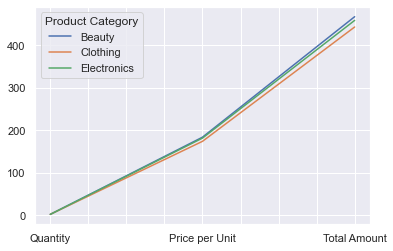

In [152]:
df3.plot()

<AxesSubplot:>

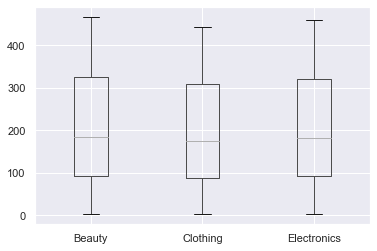

In [153]:
df3.boxplot()          #using boxplot we can easily identify the outliers. there are no outliers as of now.

<AxesSubplot:ylabel='Gender'>

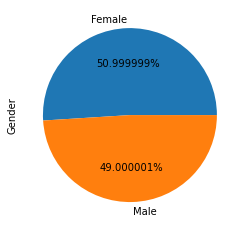

In [80]:
df['Gender'].value_counts().plot(kind='pie',autopct='%2f%%')         

#The Gender percentage of the people that shows the difference about who shopped more Frequently.

<AxesSubplot:>

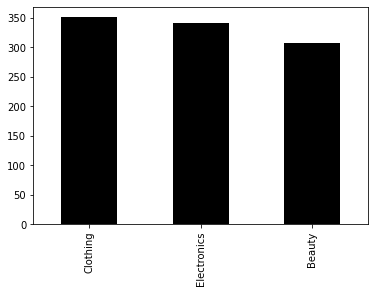

In [88]:
df['Product Category'].value_counts().plot(kind='bar', color='black')

In [90]:
df['Quantity'].describe()

count    1000.000000
mean        2.514000
std         1.132734
min         1.000000
25%         1.000000
50%         3.000000
75%         4.000000
max         4.000000
Name: Quantity, dtype: float64

(array([0, 1, 2, 3]),
 [Text(0, 0, '4'), Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')])

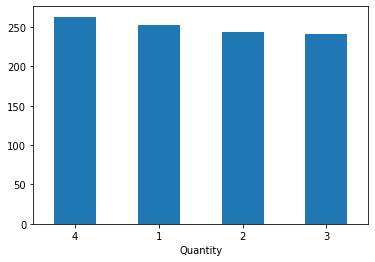

In [106]:
df['Quantity'].value_counts().plot(kind='bar')
plt.xlabel('Quantity')
plt.xticks(rotation = 0)

In [101]:
df['Price per Unit'].describe()

count    1000.000000
mean      179.890000
std       189.681356
min        25.000000
25%        30.000000
50%        50.000000
75%       300.000000
max       500.000000
Name: Price per Unit, dtype: float64

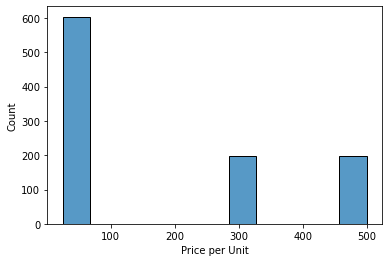

In [105]:
sns.histplot(df, x='Price per Unit')
plt.show()

In [107]:
df['Total Amount'].describe()

count    1000.000000
mean      456.000000
std       559.997632
min        25.000000
25%        60.000000
50%       135.000000
75%       900.000000
max      2000.000000
Name: Total Amount, dtype: float64

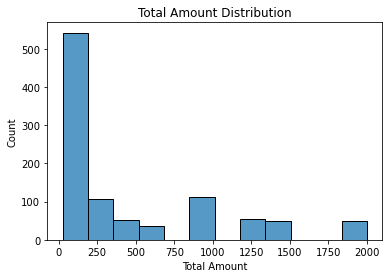

In [108]:
sns.histplot(df['Total Amount'])
plt.title('Total Amount Distribution')
plt.show()

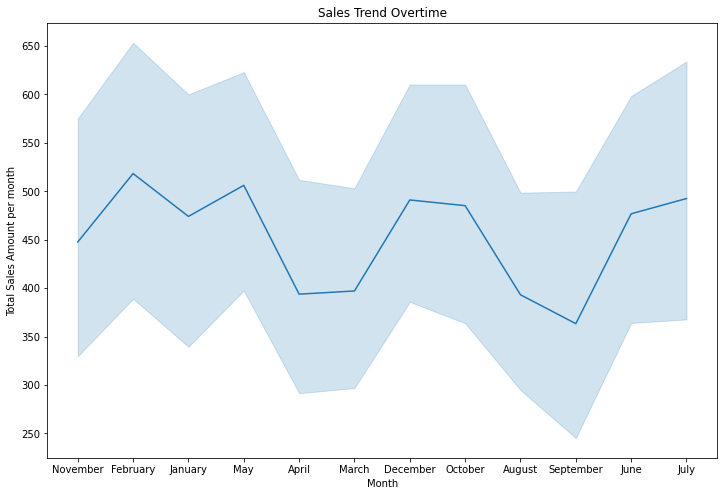

In [113]:
#Time Series Analysis

plt.figure(figsize=(12,8))
sns.lineplot(x='Month', y='Total Amount', data= df)
plt.title('Sales Trend Overtime')
plt.xlabel('Month')
plt.ylabel('Total Sales Amount per month')
plt.show()

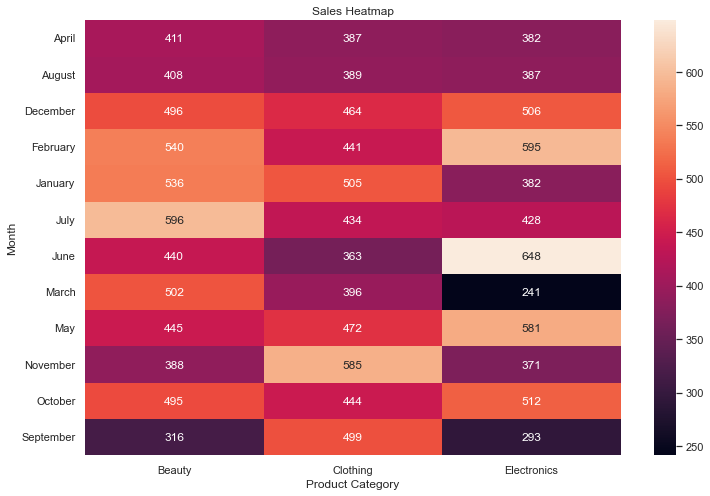

In [139]:
#Analyzing Sales of Product Categories per month

heatmap = df.pivot_table(index='Month', columns='Product Category', values='Total Amount')
plt.figure(figsize=(12,8))
sns.heatmap(heatmap, annot=True, fmt='.0f')
plt.title('Sales Heatmap')
plt.xlabel('Product Category')
plt.ylabel('Month')
plt.show()

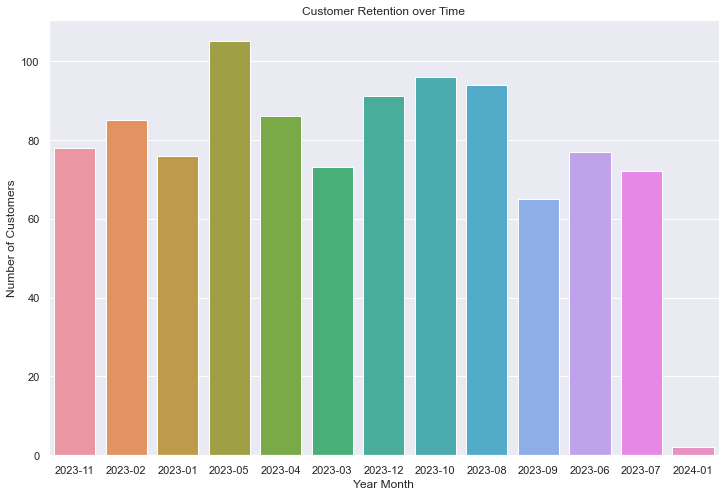

In [159]:
#Customer and Product Analysis
#Showing Customer Retention over Time

retention = df.groupby('Customer ID')['Date'].min().reset_index()
retention['Year Month'] = retention['Date'].dt.to_period('M')

plt.figure(figsize=(12,8))
sns.countplot(x='Year Month', data= retention)
plt.title('Customer Retention over Time')
plt.xlabel('Year Month')
plt.ylabel('Number of Customers')
plt.show()

In [155]:
#Analyzing product quantity purchased by diffrent Age Group
# Dividing Age Category 

age_bins = [0, 18, 25, 35, 50, 100]
age_group = ['0-18', '19-25', '26-35', '36-50', '50+']
df['Age Group'] = pd.cut(df['Age'], bins = age_bins, labels=age_group)
df.head()

,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Month,Age Group
0,2023-11-24,CUST001,Male,34,Beauty,3,50,150,November,26-35
1,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,February,26-35
2,2023-01-13,CUST003,Male,50,Electronics,1,30,30,January,36-50
3,2023-05-21,CUST004,Male,37,Clothing,1,500,500,May,36-50
4,2023-05-06,CUST005,Male,30,Beauty,2,50,100,May,26-35


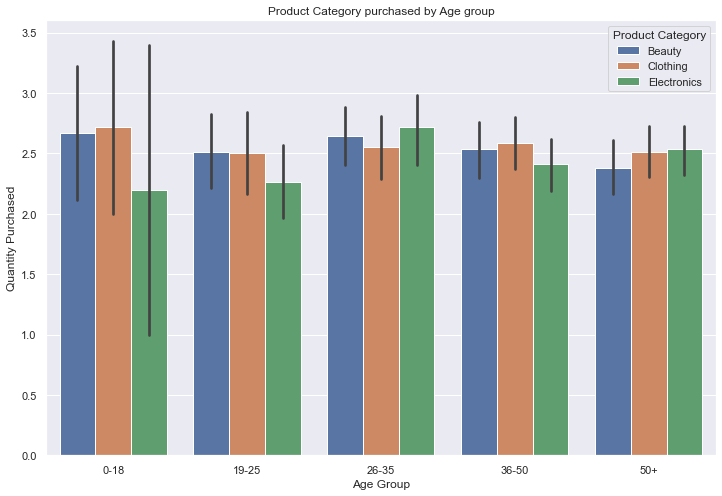

In [157]:
# bar plot 

plt.figure(figsize=(12,8))
sns.barplot(x='Age Group', y='Quantity', hue= 'Product Category', data=df)
plt.title('Product Category purchased by Age group')
plt.xlabel('Age Group')
plt.ylabel('Quantity Purchased')
plt.show()

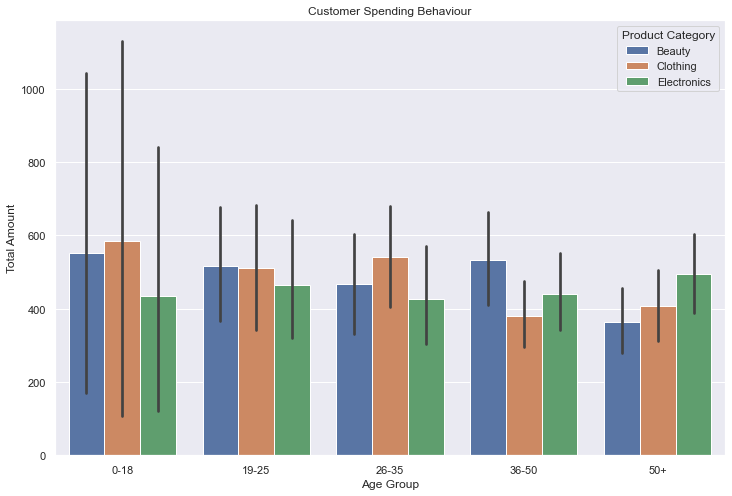

In [158]:
#Analyzing Customer Spending Behaviour

plt.figure(figsize=(12,8))
sns.barplot(x='Age Group', y='Total Amount', hue='Product Category', data=df)
plt.title('Customer Spending Behaviour')
plt.xlabel('Age Group')
plt.ylabel('Total Amount')
plt.show()

In [ ]:
                                        -------- END OF THE PROJECT-------